#Q_learning

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

def rargmax(vector):
  m = np.amax(vector)
  indices = np.nonzero(vector == m)[0]
  return pr.choice(indices)

register(
    id = 'FrozenLake-v1',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name' : '4x4',
              'is_slippery' : False}
)
env = gym.make('FrozenLake-v1')
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 2000

rList = []
for i in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False

  while not done:
    action = rargmax(Q[state, :])
    new_state, reward, done,_ = env.step(action)
    Q[state, action] = reward + np.max(Q[new_state, :])
    rAll += reward
    state = new_state

  rList.append(rAll)

Succes rate : 0.9185
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


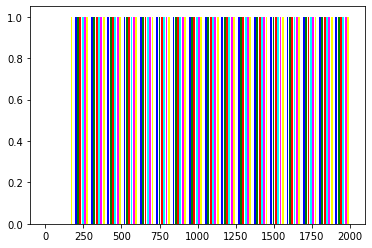

In [ ]:
colors = ["red","green","blue","white","yellow","magenta","cyan"]
print("Succes rate : " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color = colors)
plt.show()

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=False, size=(1400, 900))
_ = display.start()

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr
from gym.wrappers.monitoring.video_recorder import VideoRecorder

before_training = "before_training.mp4"

def rargmax(vector):
  m = np.amax(vector)
  indices = np.nonzero(vector == m)[0]
  return pr.choice(indices)

register(
    id = 'FrozenLake-v1',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name' : '4x4',
              'is_slippery' : False}
)
env = gym.make('FrozenLake-v1')

video = VideoRecorder(env, before_training)

Q = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 2000

rList = []
for i in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False

  while not done:
    video.capture_frame()
    action = rargmax(Q[state, :])
    new_state, reward, done,_ = env.step(action)
    Q[state, action] = reward + np.max(Q[new_state, :])
    rAll += reward
    state = new_state

  rList.append(rAll)

video.close()
env.close()

/usr/local/lib/python3.8/dist-packages/gym/envs/registration.py:542: UserWarning: WARN: Overriding environment FrozenLake-v1
  logger.warn(f"Overriding environment {spec.id}")
/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment FrozenLake-v1 initialized with `render_mode=None` is marked as deprecated and w

In [ ]:
from base64 import b64encode
def render_mp4(videopath: str) -> str:
  """
  Gets a string containing a b4-encoded version of the MP4 video
  at the specified path.
  """
  mp4 = open(videopath, 'rb').read()
  base64_encoded_mp4 = b64encode(mp4).decode()
  return f'<video width=400 controls><source src="data:video/mp4;' \
         f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'

In [ ]:
from IPython.display import HTML
html = render_mp4(before_training)
HTML(html)